In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [27]:
car_data=pd.read_csv("car data.csv")

In [28]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
car_data.shape

(301, 9)

In [31]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [33]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [34]:
print(car_data["Fuel_Type"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [35]:
print(car_data["Transmission"].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [36]:
print(car_data["Seller_Type"].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [37]:
fuel_type = car_data["Fuel_Type"]
seller_type = car_data["Seller_Type"]
transmission_type = car_data["Transmission"]
selling_price = car_data["Selling_Price"]

Text(0, 0.5, 'Selling_price')

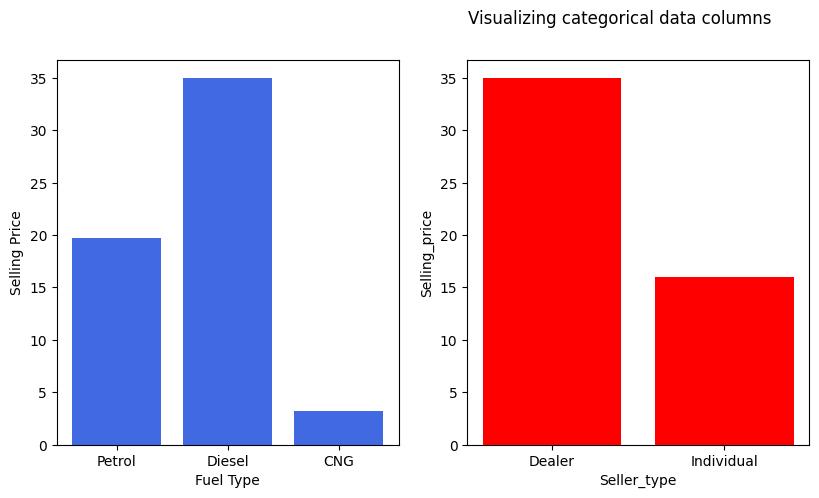

In [38]:

fig = plt.figure(figsize=(15,5))
fig.suptitle("Visualizing categorical data columns")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color="royalblue")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type , selling_price ,color="red")
plt.xlabel("Seller_type")
plt.ylabel("Selling_price")

In [39]:
fig.suptitle("Visualizing Categorical Columns")
sns.barplot(x=fuel_type , y=selling_price,ax=axes[0])


NameError: name 'axes' is not defined

In [47]:
petrol_data = car_data.groupby("Fuel_Type").get_group("Petrol")
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [49]:
petrol_data.shape

(239, 9)

In [57]:
#one hot encoding
car_data = pd.get_dummies(car_data , columns=["Fuel_Type"],drop_first=True)

In [58]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,1,0


/var/folders/vg/hmnyhwr52x3dprvyvy3d9q1w0000gn/T/ipykernel_87503/164616043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),annot=True)


<AxesSubplot: >

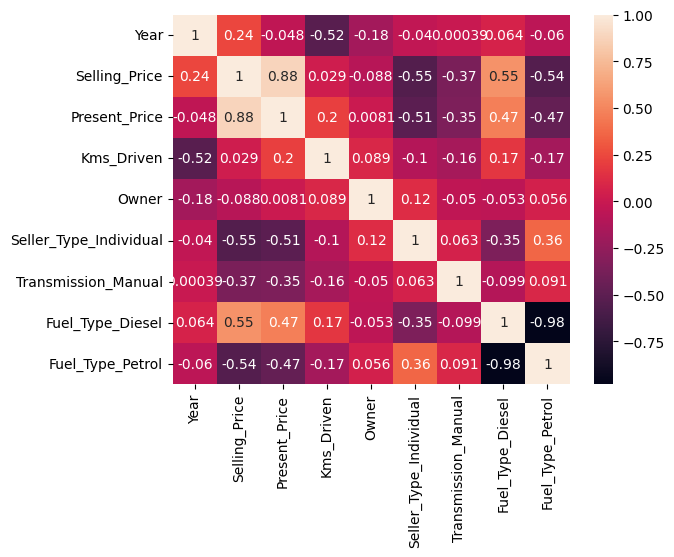

In [59]:
#heat map
sns.heatmap(car_data.corr(),annot=True)

<AxesSubplot: title={'center': 'correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

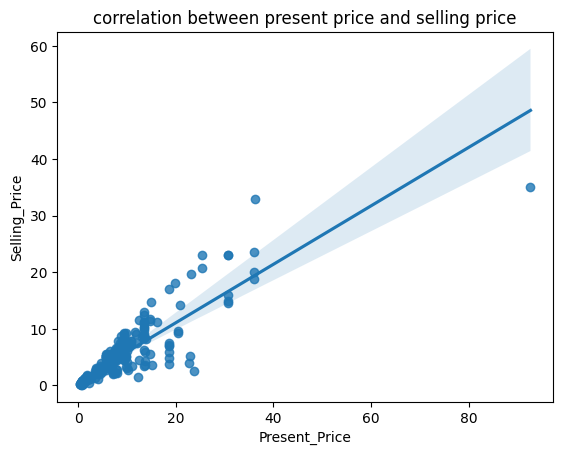

In [60]:
#regression plot
plt.title("correlation between present price and selling price")
sns.regplot(x="Present_Price",y="Selling_Price",data=car_data)

In [61]:
X= car_data.drop(["Car_Name","Selling_Price"],axis=1)
Y=car_data["Selling_Price"]

In [63]:
X.shape


(301, 8)

In [64]:
Y.shape

(301,)

In [65]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

In [66]:
X_train.head()

,Year,Present_Price,Kms_Driven,Owner,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
26,2013,5.87,55138,0,0,1,0,1
251,2013,9.90,56701,0,0,1,0,1
259,2014,7.00,36054,0,0,1,0,1
280,2015,5.90,14465,0,0,1,0,1
110,2016,1.78,6000,0,1,1,0,1


In [67]:
X_test.head()

,Year,Present_Price,Kms_Driven,Owner,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
32,2014,7.49,39000,0,0,1,1,0
128,2017,0.87,3000,0,1,1,0,1
163,2010,0.95,27000,0,1,1,0,1
240,2012,9.40,32322,0,0,1,1,0
267,2016,9.40,19434,0,0,1,1,0


In [68]:
Y_train.head()

26     4.15
251    5.00
259    3.90
280    5.25
110    1.20
Name: Selling_Price, dtype: float64

In [69]:
model=LinearRegression()

In [70]:
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
pred=model.predict(X_test)

<AxesSubplot: ylabel='Selling_Price'>

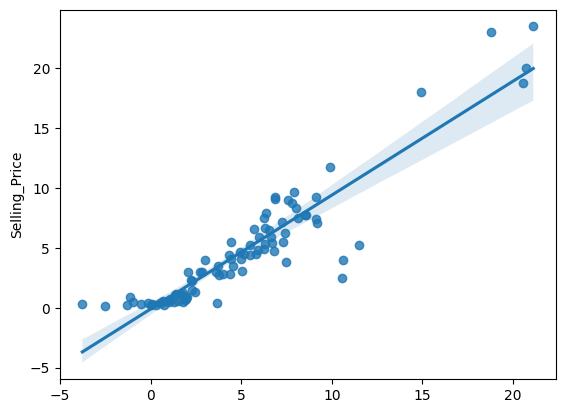

In [73]:
sns.regplot(x=pred,  y=Y_test)